In [1]:
import sys, os
sys.path.append("../../modules")
sys.path.append("../../dense_correspondence")
print(os.getenv("DC_SOURCE_DIR"))
print(os.getenv("DC_DATA_DIR"))

/home/ruiqiwang/ruiqi/pytorch-dense-correspondence
/home/ruiqiwang/ruiqi/pytorch-dense-correspondence/data/pdc


In [2]:
import dense_correspondence_manipulation.utils.utils as utils
utils.add_dense_correspondence_to_python_path()
from dense_correspondence.training.training import *
import sys
import logging

#utils.set_default_cuda_visible_devices()
utils.set_cuda_visible_devices([0]) # use this to manually set CUDA_VISIBLE_DEVICES

from dense_correspondence.training.training import DenseCorrespondenceTraining
from dense_correspondence.dataset.spartan_dataset_masked import SpartanDataset
logging.basicConfig(level=logging.INFO)

from dense_correspondence.evaluation.evaluation import DenseCorrespondenceEvaluation


setting CUDA_VISIBLE_DEVICES =  0,


## Load the configuration for training

In [3]:
config_filename = os.path.join(utils.getDenseCorrespondenceSourceDir(), 'config', 'dense_correspondence', 
                               'dataset', 'composite', 'caterpillar_upright.yaml')
config = utils.getDictFromYamlFilename(config_filename)

train_config_file = os.path.join(utils.getDenseCorrespondenceSourceDir(), 'config', 'dense_correspondence', 
                               'training', 'training.yaml')

train_config = utils.getDictFromYamlFilename(train_config_file)
dataset = SpartanDataset(config=config)

logging_dir = "trained_models/tutorials"
num_iterations = 3500
d = 3 # the descriptor dimension
name = "caterpillar_%d" %(d)
train_config["training"]["logging_dir_name"] = name
train_config["training"]["logging_dir"] = logging_dir
train_config["dense_correspondence_network"]["descriptor_dimension"] = d
train_config["training"]["num_iterations"] = num_iterations

TRAIN = True
EVALUATE = True

Using SpartanDataset:
   - in train mode
   - number of scenes 11
   - total images:     2851


## Train the network

This should take about ~12-15 minutes with a GTX 1080 Ti

In [4]:
# All of the saved data for this network will be located in the
# code/data/pdc/trained_models/tutorials/caterpillar_3 folder

if TRAIN:
    print("training descriptor of dimension %d" %(d))
    train = DenseCorrespondenceTraining(dataset=dataset, config=train_config)
    train.run()
    print("finished training descriptor of dimension %d" %(d))


INFO:root:Loading pose data for scene 2018-04-10-16-02-59
INFO:root:Loading pose data for scene 2018-04-10-16-04-10
INFO:root:Loading pose data for scene 2018-04-10-16-06-26
INFO:root:Loading pose data for scene 2018-04-10-16-12-21
INFO:root:Loading pose data for scene 2018-04-10-16-13-37
INFO:root:Loading pose data for scene 2018-04-10-16-16-15
INFO:root:Loading pose data for scene 2018-04-16-14-25-19


training descriptor of dimension 3


INFO:root:Loading pose data for scene 2018-04-16-14-40-25
INFO:root:Loading pose data for scene 2018-04-10-16-08-46
INFO:root:Loading pose data for scene 2018-04-16-14-44-53
INFO:root:Loading pose data for scene 2018-04-16-15-23-41
INFO:root:enabling domain randomization
INFO:root:setting up tensorboard_logger
INFO:root:tensorboard logger started


using SINGLE_OBJECT_WITHIN_SCENE
<class 'float'>
float64
logging_dir: /home/ruiqiwang/ruiqi/pytorch-dense-correspondence/data/pdc/trained_models/tutorials/caterpillar_3


INFO:root:Training on iteration 100 of 3500
INFO:root:single iteration took 0.062 seconds
INFO:root:Training is 2 percent complete

INFO:root:Training on iteration 200 of 3500
INFO:root:single iteration took 0.061 seconds
INFO:root:Training is 5 percent complete

INFO:root:Training on iteration 300 of 3500
INFO:root:single iteration took 0.060 seconds
INFO:root:Training is 8 percent complete

INFO:root:Training on iteration 400 of 3500
INFO:root:single iteration took 0.061 seconds
INFO:root:Training is 11 percent complete

INFO:root:Training on iteration 500 of 3500
INFO:root:single iteration took 0.059 seconds
INFO:root:Training is 14 percent complete

/home/ruiqiwang/ruiqi/pytorch-dense-correspondence/dense_correspondence/training/../../modules/dense_correspondence_manipulation/utils/utils.py:258: RuntimeWarning: invalid value encountered in arccos
  theta = 2.0 * np.arccos(2.0 * np.dot(q,r)**2 - 1.0)
/home/ruiqiwang/ruiqi/pytorch-dense-correspondence/dense_correspondence/training/..

finished training descriptor of dimension 3


## Evaluate the network quantitatively

This should take ~5 minutes.

In [5]:
model_folder = os.path.join(logging_dir, name)
model_folder = utils.convert_data_relative_path_to_absolute_path(model_folder)

INFO:root:Computing descriptor statistics on dataset
INFO:root:Loading pose data for scene 2018-04-10-16-13-37
INFO:root:Loading pose data for scene 2018-04-16-15-23-41
INFO:root:Loading pose data for scene 2018-04-10-16-02-59


Using SpartanDataset:
   - in train mode
   - number of scenes 11
   - total images:     2851


INFO:root:Loading pose data for scene 2018-04-16-14-40-25
INFO:root:Loading pose data for scene 2018-04-10-16-12-21
INFO:root:Loading pose data for scene 2018-04-10-16-08-46
INFO:root:Loading pose data for scene 2018-04-10-16-16-15
INFO:root:Loading pose data for scene 2018-04-10-16-06-26
INFO:root:Loading pose data for scene 2018-04-16-14-44-53
INFO:root:Loading pose data for scene 2018-04-16-14-25-19
INFO:root:Loading pose data for scene 2018-04-10-16-04-10
INFO:root:Evaluating network on train data


computing statistics for image 0 of 100, scene_name 2018-04-10-16-13-37
scene
computing statistics for image 5 of 100, scene_name 2018-04-10-16-16-15
scene
computing statistics for image 10 of 100, scene_name 2018-04-10-16-12-21
scene
computing statistics for image 15 of 100, scene_name 2018-04-10-16-08-46
scene
computing statistics for image 20 of 100, scene_name 2018-04-16-14-25-19
scene
computing statistics for image 25 of 100, scene_name 2018-04-16-14-25-19
scene
computing statistics for image 30 of 100, scene_name 2018-04-16-15-23-41
scene
computing statistics for image 35 of 100, scene_name 2018-04-10-16-12-21
scene
computing statistics for image 40 of 100, scene_name 2018-04-10-16-06-26
scene
computing statistics for image 45 of 100, scene_name 2018-04-10-16-13-37
scene
computing statistics for image 50 of 100, scene_name 2018-04-10-16-04-10
scene
computing statistics for image 55 of 100, scene_name 2018-04-10-16-13-37
scene
computing statistics for image 60 of 100, scene_name 2

INFO:root:Evaluating network on test data
INFO:root:Loading pose data for scene 2018-04-10-16-11-10


computing statistics for image 0 of 100, scene_name 2018-04-10-16-11-10
scene


INFO:root:Loading pose data for scene 2018-04-16-14-46-36


computing statistics for image 5 of 100, scene_name 2018-04-16-14-46-36
scene


INFO:root:Loading pose data for scene 2018-04-16-14-42-26


computing statistics for image 10 of 100, scene_name 2018-04-16-14-46-36
scene
computing statistics for image 15 of 100, scene_name 2018-04-16-14-42-26
scene
computing statistics for image 20 of 100, scene_name 2018-04-16-14-42-26
scene
computing statistics for image 25 of 100, scene_name 2018-04-16-14-46-36
scene
computing statistics for image 30 of 100, scene_name 2018-04-10-16-11-10
scene
computing statistics for image 35 of 100, scene_name 2018-04-10-16-11-10
scene
computing statistics for image 40 of 100, scene_name 2018-04-10-16-11-10
scene
computing statistics for image 45 of 100, scene_name 2018-04-10-16-11-10
scene
computing statistics for image 50 of 100, scene_name 2018-04-16-14-42-26
scene
computing statistics for image 55 of 100, scene_name 2018-04-16-14-46-36
scene
computing statistics for image 60 of 100, scene_name 2018-04-16-14-46-36
scene
computing statistics for image 65 of 100, scene_name 2018-04-10-16-11-10
scene
computing statistics for image 70 of 100, scene_name

INFO:root:Evaluating network on cross scene data
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing


Expanding amount of matches between:
scene_name_a 2018-04-16-14-40-25
scene_name_b 2018-04-10-16-02-59
originally had 6 matches
now, index of pixel match: 0
(395, 136)
(390, 194)
now, index of pixel match: 1
(440, 178)
(406, 262)
now, index of pixel match: 2
(343, 252)
(272, 281)
now, index of pixel match: 3
(296, 292)
(190, 293)
now, index of pixel match: 4
(301, 243)
(224, 246)
now, index of pixel match: 5
(384, 284)
(291, 337)


/home/ruiqiwang/ruiqi/pytorch-dense-correspondence/dense_correspondence/training/../../modules/dense_correspondence_manipulation/utils/utils.py:258: RuntimeWarning: invalid value encountered in arccos
  theta = 2.0 * np.arccos(2.0 * np.dot(q,r)**2 - 1.0)
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
/home/ruiqiwang/ruiqi/pytorch-dense-correspondence/dense_correspondence/training/../../modules/dense_correspondence_manipulation/utils/utils.py:258: RuntimeWarning: invalid value encountered in arccos
  theta = 2.0 * np.arccos(2.0 * np.do

Expanding amount of matches between:
scene_name_a 2018-04-16-14-44-53
scene_name_b 2018-04-10-16-12-21
originally had 4 matches
now, index of pixel match: 0
(102, 194)
(203, 116)
now, index of pixel match: 1
(226, 366)
(312, 410)
now, index of pixel match: 2
(212, 320)
(313, 364)
now, index of pixel match: 3
(156, 270)
(264, 257)


INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing


Expanding amount of matches between:
scene_name_a 2018-04-16-14-42-26
scene_name_b 2018-04-10-16-02-59
originally had 5 matches
now, index of pixel match: 0
(199, 124)
(629, 178)
now, index of pixel match: 1
(257, 130)
(542, 186)
now, index of pixel match: 2
(296, 78)
(505, 206)
now, index of pixel match: 3
(248, 71)
(588, 202)
now, index of pixel match: 4
(184, 13)
(603, 265)


INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing


('at least one of these scene names does not exist:', '2018-04-16-15-23-41', '2018-04-16-15-28-45')
('at least one of these scene names does not exist:', '2018-04-16-15-28-45', '2018-04-10-16-12-21')
('at least one of these scene names does not exist:', '2018-04-16-14-49-22', '2018-04-10-16-14-41')
('at least one of these scene names does not exist:', '2018-04-16-15-28-45', '2018-04-10-16-16-15')
Expanding amount of matches between:
scene_name_a 2018-04-10-16-16-15
scene_name_b 2018-04-10-16-12-21
originally had 3 matches
now, index of pixel match: 0
(432, 266)
(194, 391)
now, index of pixel match: 1
(384, 337)
(162, 460)
now, index of pixel match: 2
(480, 348)
(252, 460)


/home/ruiqiwang/ruiqi/pytorch-dense-correspondence/dense_correspondence/training/../../modules/dense_correspondence_manipulation/utils/utils.py:258: RuntimeWarning: invalid value encountered in arccos
  theta = 2.0 * np.arccos(2.0 * np.dot(q,r)**2 - 1.0)
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:no matches found, continuing
INFO:root:Making plots
INFO:root:Finished running evaluation on network


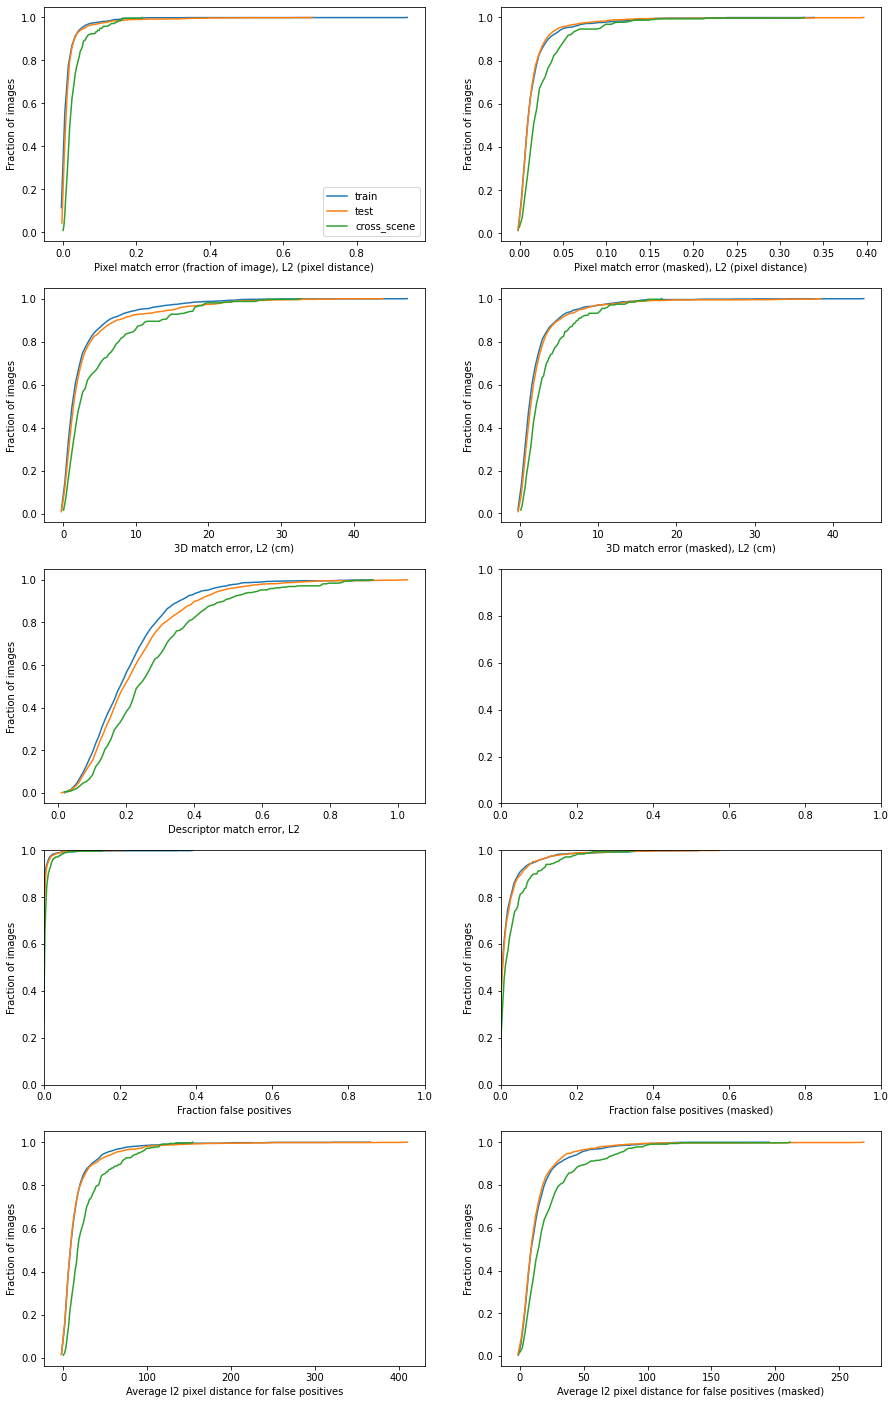

In [6]:
model_folder = os.path.join(logging_dir, name)
model_folder = utils.convert_data_relative_path_to_absolute_path(model_folder)

if EVALUATE:
    DCE = DenseCorrespondenceEvaluation
    num_image_pairs = 100
    DCE.run_evaluation_on_network(model_folder, num_image_pairs=num_image_pairs)      

See `evaluation_quantitative_tutorial.ipynb` for a better place to display the plots.